# Introduction

This project is my take on applying data science to Magic: The Gathering (MTG) collectable card game.  

MTG can be fodder for may aspects data science.  Here are a few aspects that we may explore:
- __Regression:__ Predict card's associated win rate based on card attributes.
- __LLMs:__ Build numeric representations from card descriptions.  Use representations for predictive tasks.
- __Network Science:__ Bipartite graphs of deck-card relationships.  Identify communities in card one-mode projection.
- __Graph Neural Networks:__ Predict deck win rate with given card compositions.
- __Bayesian Inference:__ Posterior distribution of a booster pack's value given the pack composition and secondary market prices.
- __Time-Series Analysis:__ Predict card price on secondary market $d$ days after set release.
- __Hidden Markov Models:__ Estimation of board state, such as opening, parity, winning, or losing state per [Quadrant Theory](https://magic.wizards.com/en/news/feature/quadrant-theory-2014-08-20).


# Python Environment Setup

Refer to the [README.md](../README.md) for the environment setup.

# Scope

## Card Scope

### OTJ Set Description

To keep the problem space tractable, I'll limit the analysis to the [Outlaws of Thunder Junction](https://mtg.fandom.com/wiki/Outlaws_of_Thunder_Junction) (OTJ) set, which was released on April 19, 2024.  

The set contains 276 regular cards comprised of:

- 91 Commons
- 100 Uncommons
- 60 Rares
- 20 Mythic rares 
- 5 Basic lands

Additional "booster fun" cards include:
- 13 Showcase "Wanted Poster" cards
- 60 Extended Art cards
- 13 Borderless cards
- 6 Bundle Basics lands
- 7 Promos

For game play analysis, I'll focus on the 276 regular cards.  For market analysis, I'll include the booster fun cards, as the scarcity and desirability of these cards may affect the secondary market prices and will be interesting to explore.

### Card Data Sources

I'll use the card data generously made available by the tireless folks at the open-source project [MTGJSON](https://mtgjson.com/).  MTGJSON provides a comprehensive database of MTG cards, including card attributes, card text, and card prices.  The data is available in JSON format, which I'll convert to a pandas DataFrame for analysis.

An alternative excellent source of MTG data is [Scryfall](https://scryfall.com/docs/api).  

A nice source of data for booster pack composition is [mtg.wtf](https://mtg.wtf/).  The source code provided by [taw](https://github.com/taw) on [github](https://github.com/taw/magic-search-engine?tab=readme-ov-file) contains estimated booster pack composition probabilities.  Note that booster pack composition is proprietary information of Wizards of the Coast, and the above probabilities are estimates.

### Card EDA

Refer to the [UPDATE.ipynb](UPDATE.ipynb) for the exploratory data analysis of the card data.  


## Play Format Scope

### Limited Play
For game play, I will look at limited formats, such as Draft and Sealed Deck.  Constructed formats, such as Standard, Modern, and Legacy, are out of scope for now.  This is due to the complexity of the metagame and the vast number of cards available for deck construction.  

Draft play also allows us to study three types of player skill.  First, there is the skill of drafting the best cards from the draft pool based on one's currently drafted cards.  Second, there is the skill of deck construction from the drafted cards.  Third, there is the skill of playing the deck in a tournament setting. 

Sealed and constructed formats are also interesting, but exclude the drafting skill.  Constructed formats also require a deep understanding of the metagame, which is out of scope for now.


### MTG Arena Draft

I will specifically look at the Draft format on [MTG Arena](https://magic.wizards.com/en/mtgarena).  MTG Arena is an online platform for playing MTG.  The Draft format on MTG Arena is a popular way to play limited MTG.  In the Draft format, players open booster packs and pick one card from the pack.  The remaining cards are passed to the next player.  This process continues until all cards are picked.  Players then construct a deck from the picked cards and play a tournament with the constructed deck.

MTG Arena offers several Draft formats.  I will focus on the [Premier Draft](https://magicarena.fandom.com/wiki/Premier_Draft) format, which is a best-of-one (Bo1) format.  In the Premier Draft format, players draft against other players in a pod of 8 players.  Players play a tournament with the drafted deck.  Players play until they reach 7 wins or 3 losses.  Players have a sideboard and are allowed to change the deck composition between games.

Other formats include Quick Draft, which also Bo1, but the drafting process in against a pool of bots, and play is against players with independent draft pools.  Traditional Draft is a best-of-three (Bo3) format.  Sealed Deck is another limited format where players open 6 booster packs and construct a deck from the opened cards.  These are out of scope for now.

### Draft Play Data Sources

For draft play, I will used data from [17lands](https://www.17lands.com/public_datasets).  They compile data from their user base to provide draft pick data.  The data includes the draft pick order, the cards picked, and the win rate of the deck.

### Draft EDA

Refer to the [UPDATE.ipynb](UPDATE.ipynb) for the exploratory data analysis of the draft data.

# Causality

To make better decisions with our statistical and ML models, I will explore the causal relationships for both winning MTG.  This analysis will be informal and exploratory.  I will use the [directed acyclic graph (DAG) framework](https://mixtape.scunning.com/03-directed_acyclical_graphs) to identify potential causal relationships between card attributes and win rate.

Later, we may do more formal causal inference using the [doWhy](https://microsoft.github.io/dowhy/) and [CausalImpact](https://google.github.io/CausalImpact/CausalImpact.html) libraries and test for identifiability, consistency, and robustness of our causal models.

For a more in-depth discussion of causality in data science, refer to the works of [Judea Pearl](https://en.wikipedia.org/wiki/Judea_Pearl) or [Richard McElreath](https://xcelab.net/rm/statistical-rethinking/).



## Card Impact in Draft Play

Let's look at the causal relationship between a card and it ability to affect a player's success in draft play.

### Card Impact

I will use the term "impact" to describe the ability of a card to contribute to winning a game.  The impact of the card is the abstract concept that we are trying to measure.  The impact of a card is not directly observable, but we can infer it from the a player's success with or without the card in the play deck.

Common terms for card impact can be "power level" or "playability".  These terms are often used interchangeably, but I will use "impact" to describe the abstract concept of a card's ability to contribute to winning a game.

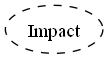

In [55]:
from graphviz import Digraph
from IPython.display import Image

# Initialize a directed graph
dot = Digraph(comment='Card Impact', format='png')
dot.attr(rankdir='LR')

# Define the impact node
dot.node(name='I', label='Impact', shape='oval', style='dashed')

# Render and display the graph in Jupyter Notebook
Image(dot.render(filename='../images/dags/dags', format='png', cleanup=True))

### Play Success

- __Win Rate:__ The win rate of a deck with the card in the deck.
- __Pick Rate:__ The frequency of the card being picked in the draft.
- __Play Rate:__ The frequency of the card being played in the tournament.
- __Win Rate Delta:__ The change in win rate when the card is in the deck.
- __Win Rate Delta Rank:__ The rank of the card based on the win rate delta.
- __Win Rate Delta Significance:__ The statistical significance of the win rate delta.



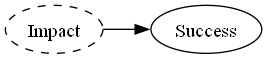

In [56]:
# Add success node
dot.node(name='S', label='Success', shape='oval')

# Define edges for fields and relationships
dot.edge(tail_name='I', head_name='S')

# Render and display the graph in Jupyter Notebook
Image(dot.render(filename='../images/dags/dags', format='png', cleanup=True))

### Context within Deck Composition

A card is strong if it interacts well with the other cards in it's deck.  Most obviously, putting a mythic rare green card in a deck without green mana is useless.  A high mana-cost card in a deck with poor mana acceleration is weak.


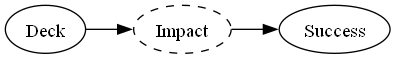

In [57]:
dot.node(name='D', label='Deck', shape='oval')
dot.edge(tail_name='D', head_name='I')
Image(dot.render(filename='../images/dags/dags', format='png', cleanup=True))

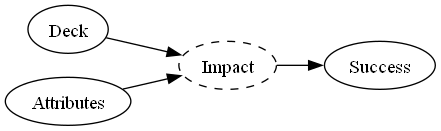

In [58]:
dot.node(name='A', label='Attributes', shape='oval')
dot.edge(tail_name='A', head_name='I')
Image(dot.render(filename='../images/dags/dags', format='png', cleanup=True))

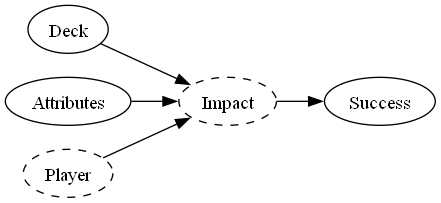

In [59]:
dot.node(name='P', label='Player', shape='oval', style='dashed')
dot.edge(tail_name='P', head_name='I')
Image(dot.render(filename='../images/dags/dags', format='png', cleanup=True))

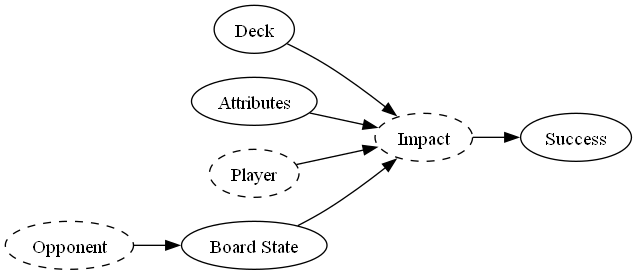

In [60]:
dot.node(name='B', label='Board State', shape='oval')
dot.node(name='O', label='Opponent', shape='oval', style='dashed')
dot.edge(tail_name='B', head_name='I')
dot.edge(tail_name='O', head_name='B')
Image(dot.render(filename='../images/dags/dags', format='png', cleanup=True))

## Secondary Card Value

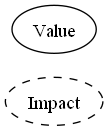

In [93]:
dot = Digraph(comment='Card Value', format='png')
dot.attr(rankdir='LR')
dot.node(name='I', label='Impact', shape='oval', style='dashed')
dot.node(name='V', label='Value', shape='oval')
Image(dot.render(filename='../images/dags/dags', format='png', cleanup=True))

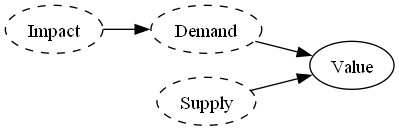

In [94]:
dot.node(name='S', label='Supply', shape='oval', style='dashed')
dot.node(name='D', label='Demand', shape='oval', style='dashed')
dot.edge(tail_name='I', head_name='D')
dot.edge(tail_name='S', head_name='V')
dot.edge(tail_name='D', head_name='V')
Image(dot.render(filename='../images/dags/dags', format='png', cleanup=True))

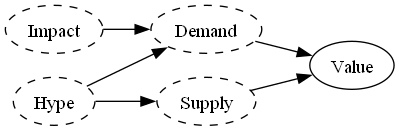

In [95]:
dot.node(name='H', label='Hype', shape='oval', style='dashed')
dot.edge(tail_name='H', head_name='D')
dot.edge(tail_name='H', head_name='S')
Image(dot.render(filename='../images/dags/dags', format='png', cleanup=True))